## User classification, predection on Telecom services ##

In [78]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
# Importing datasets
df=pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [80]:
df.head(20)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,No,No,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [81]:
df.shape

(5986, 22)

In [82]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [83]:
df.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [84]:
# Total charges data type is object, we need to convert into float
df['TotalCharges'].dtypes

dtype('O')

In [85]:
df.isnull().sum()
#No null value is present

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [86]:
#categorisation od data
df=df.replace('Yes', 1)
df=df.replace('No',0)

df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,1,1,72,1,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,4528,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,6344,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,6739,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,432,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


In [87]:
pd.set_option('display.max_columns', None)

In [88]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,1,1,72,1,1,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,4528,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,6344,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,6739,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,432,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


In [89]:
df=df.replace('No internet service', 2)
df=df.replace('No phone service',3)


In [90]:
df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,1,1,72,1,1,0,2,2,2,2,2,2,Two year,0,Credit card (automatic),24.10,1734.65,0
1,4528,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,6344,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,6739,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,432,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


In [91]:
df['gender']=df['gender'].astype('category')

In [92]:
df['gender']=df['gender'].cat.codes
#Through categorisation 'Male'=1, 'Female'=0

In [93]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,1,0,1,1,72,1,1,0,2,2,2,2,2,2,Two year,0,Credit card (automatic),24.10,1734.65,0
1,4528,9688-YGXVR,0,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,6344,9286-DOJGF,0,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,6739,6994-KERXL,1,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,432,2181-UAESM,1,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


In [94]:
df.isnull().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [95]:
df['PaymentMethod']=df['PaymentMethod'].astype('category')

In [96]:
df['PaymentMethod']=df['PaymentMethod'].cat.codes

In [97]:
df.head(20)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,1,0,1,1,72,1,1,0,2,2,2,2,2,2,Two year,0,1,24.10,1734.65,0
1,4528,9688-YGXVR,0,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,1,88.15,3973.2,0
2,6344,9286-DOJGF,0,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,0,74.95,2869.85,1
3,6739,6994-KERXL,1,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,2,55.90,238.5,0
4,432,2181-UAESM,1,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,2,53.45,119.5,0
5,2215,4312-GVYNH,0,0,1,0,70,0,3,DSL,1,0,1,1,0,1,Two year,1,0,49.85,3370.2,0
6,5260,2495-KZNFB,0,0,0,0,33,1,1,Fiber optic,1,0,0,0,0,1,Month-to-month,1,2,90.65,2989.6,0
7,6001,4367-NHWMM,0,0,0,0,1,0,3,DSL,0,0,0,0,0,0,Month-to-month,1,3,24.90,24.9,0
8,1480,8898-KASCD,1,0,0,0,39,0,3,DSL,0,0,1,1,0,0,One year,0,3,35.55,1309.15,0
9,5137,8016-NCFVO,1,1,0,0,55,1,1,Fiber optic,1,1,1,1,1,1,Month-to-month,1,2,116.50,6382.55,0


In [98]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,1,0,1,1,72,1,1,0,2,2,2,2,2,2,Two year,0,1,24.10,1734.65,0
1,4528,9688-YGXVR,0,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,1,88.15,3973.2,0
2,6344,9286-DOJGF,0,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,0,74.95,2869.85,1
3,6739,6994-KERXL,1,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,2,55.90,238.5,0
4,432,2181-UAESM,1,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,2,53.45,119.5,0


In [99]:
df=df.drop(['Unnamed: 0','customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,2,2,2,2,2,2,Two year,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,1,88.15,3973.2,0
2,0,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,DSL,0,0,0,0,0,1,Month-to-month,1,2,55.90,238.5,0
4,1,0,0,0,2,1,0,DSL,1,0,1,0,0,0,Month-to-month,0,2,53.45,119.5,0


In [100]:
df['InternetService']=df['InternetService'].astype('category')

In [101]:
df['InternetService']=df['InternetService'].cat.codes

In [102]:
df.head(7)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,2,2,2,2,2,2,Two year,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,Month-to-month,1,1,88.15,3973.2,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,Month-to-month,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,Month-to-month,1,2,55.90,238.5,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,Month-to-month,0,2,53.45,119.5,0
5,0,0,1,0,70,0,3,1,1,0,1,1,0,1,Two year,1,0,49.85,3370.2,0
6,0,0,0,0,33,1,1,2,1,0,0,0,0,1,Month-to-month,1,2,90.65,2989.6,0


In [103]:
df['Contract']=df['Contract'].astype('category')
df['Contract']=df['Contract'].cat.codes
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,2,2,2,2,2,2,2,0,1,24.10,1734.65,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,0,1,1,88.15,3973.2,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,2,55.90,238.5,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,2,53.45,119.5,0


In [104]:
df['Contract'].value_counts()

0    3269
2    1441
1    1276
Name: Contract, dtype: int64

In [105]:
df.dtypes

gender                 int8
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService        int8
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract               int8
PaperlessBilling      int64
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [106]:
df['MonthlyCharges']=df['MonthlyCharges'].astype(int)

In [107]:
df['TotalCharges']=df['TotalCharges'].astype(str)
df['TotalCharges']=df['TotalCharges'].replace(' ', 0)
df['TotalCharges']=df['TotalCharges'].astype(float)
df['TotalCharges']=df['TotalCharges'].astype(int)

In [108]:
df.head()
#All the features are converted into integer data type

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,72,1,1,0,2,2,2,2,2,2,2,0,1,24,1734,0
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,0,1,1,88,3973,0
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,0,1,0,74,2869,1
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,2,55,238,0
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,2,53,119,0


In [109]:
df.dtypes

gender               int8
SeniorCitizen       int64
Partner             int64
Dependents          int64
tenure              int64
PhoneService        int64
MultipleLines       int64
InternetService      int8
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
Contract             int8
PaperlessBilling    int64
PaymentMethod        int8
MonthlyCharges      int64
TotalCharges        int64
Churn               int64
dtype: object

In [110]:
#Creating new dataframe with total carges
df_tot=df['TotalCharges']

In [111]:
#Feature matrics
x=df.drop('Churn', axis=1)
#Response vector
y=df['Churn']

In [112]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,72,1,1,0,2,2,2,2,2,2,2,0,1,24,1734
1,0,0,0,0,44,1,0,2,0,1,1,0,1,0,0,1,1,88,3973
2,0,1,1,0,38,1,1,2,0,0,0,0,0,0,0,1,0,74,2869
3,1,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,2,55,238
4,1,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,2,53,119


**In this scenario our prime moto is classification of customer base. Linear regression is not an effective solution for classification problem. 
I will use different classification algorithm like: Logistic regression, K-Nearest Neighbour, Support vector machine, Decision tree etc.**

In [113]:
#Importing SK Learn libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix


In [114]:
#Normalisation of feature matrics through standard scaler
x=preprocessing.StandardScaler().fit_transform(x)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [115]:
x[0:5]

array([[ 0.9811335 , -0.43866876,  1.03019162,  1.53044663,  1.61257595,
         0.33066638,  0.31303395, -1.57296039,  1.61064501,  1.57089683,
         1.57419509,  1.60807529,  1.55241631,  1.54988682,  1.56743152,
        -1.1980456 , -0.53785519, -1.33942578, -0.24615491],
       [-1.01922929, -0.43866876, -0.9706932 , -0.65340403,  0.47038747,
         0.33066638, -0.81036008,  0.9989437 , -0.90109682,  0.28276143,
         0.28951454, -0.90686623,  0.24062014, -1.08168955, -0.83406453,
         0.83469277, -0.53785519,  0.78584135,  0.73846635],
       [-1.01922929,  2.27962439,  1.03019162, -0.65340403,  0.22563279,
         0.33066638,  0.31303395,  0.9989437 , -0.90109682, -1.00537397,
        -0.995166  , -0.90686623, -1.07117602, -1.08168955, -0.83406453,
         0.83469277, -1.47487533,  0.32093917,  0.25297199],
       [ 0.9811335 , -0.43866876, -0.9706932 , -0.65340403, -1.16131037,
         0.33066638, -0.81036008, -0.28700834, -0.90109682, -1.00537397,
        -0.995

In [116]:
#Split the data into train and test data format
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=6)

In [117]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4788, 19)
(1198, 19)
(4788,)
(1198,)


## Finding the model accuracy with Logistic Regression ##

In [118]:
model_logistic=LogisticRegression()
model_logistic.fit(x_train, y_train)


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
y_prob=model_logistic.predict(x_test)
y_prob

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


array([0, 1, 1, ..., 1, 0, 1])

In [120]:
model_logistic.score(x_test, y_test)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.7954924874791319

In [121]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_prob)

array([[797,  97],
       [148, 156]])

In [122]:
g=797+97+148+156
g

1198

In [123]:
df.shape

(5986, 20)

In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       894
           1       0.62      0.51      0.56       304

   micro avg       0.80      0.80      0.80      1198
   macro avg       0.73      0.70      0.71      1198
weighted avg       0.79      0.80      0.79      1198



## K-Nearest Neighbor ##

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [126]:
knn_model=KNeighborsClassifier(n_neighbors=6)

In [127]:
knn_model.fit(x_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [128]:
y_pred_knn=knn_model.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 1])

In [129]:
y_pred_knn_train=knn_model.predict(x_train)
y_pred_knn_train

array([0, 1, 0, ..., 0, 0, 1])

In [130]:
knn_model.score(x_test, y_test)

0.7754590984974958

In [131]:
print('Accuracy of test data :', metrics.accuracy_score(y_test, y_pred_knn))
print('Accuracy of train data :', metrics.accuracy_score(y_train, y_pred_knn_train))

Accuracy of test data : 0.7754590984974958
Accuracy of train data : 0.8235171261487051


**Best 'k' value for maximum model accuracy :** 

In [147]:
k_range=range(1,20)
score=[]
for k in k_range:
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    y_pred=knn_model.predict(x_test)
    score.append(metrics.accuracy_score(y_test, y_pred))

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If

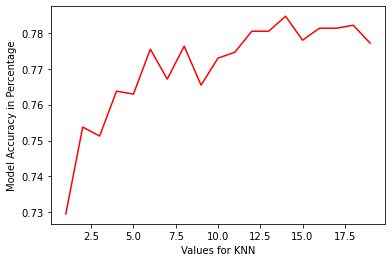

In [133]:
plt.plot(k_range, score, color='r')
plt.xlabel('Values for KNN')
plt.ylabel('Model Accuracy in Percentage')

plt.tight_layout
plt.show()

**Maximum accuracy is reached when 'k=14'**

## Support Vector Machine ##

In [134]:
from sklearn.svm import SVC

In [135]:
svm_model=SVC(kernel='linear', gamma=0.1, random_state=5)

In [136]:
svm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
  max_iter=-1, probability=False, random_state=5, shrinking=True,
  tol=0.001, verbose=False)

In [137]:
y_pred_svm=svm_model.predict(x_test)
y_pred_svm

array([0, 1, 1, ..., 0, 0, 1])

In [138]:
print('Model Accuracy', metrics.accuracy_score(y_test, y_pred_svm))

Model Accuracy 0.7921535893155259


In [139]:
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:
 [[799  95]
 [154 150]]


In [140]:
from sklearn.metrics import jaccard_similarity_score, f1_score


In [141]:
print('Jaccard Coefficient:', jaccard_similarity_score(y_test, y_pred_svm))
print('F1 SCore: ', f1_score(y_test, y_pred_svm))

Jaccard Coefficient: 0.7921535893155259
F1 SCore:  0.546448087431694


## Decision Tree ##

In [142]:
from sklearn.tree import DecisionTreeClassifier

In [143]:
DT_model=DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='random', min_impurity_decrease=0.0)

In [144]:
DT_model.fit(x_train, y_train)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [145]:
y_pred_dt=DT_model.predict(x_test)
y_pred_dt

array([0, 1, 1, ..., 1, 0, 1])

In [146]:
print('Model Accuray: ', metrics.accuracy_score(y_test, y_pred_dt))

Model Accuray:  0.7896494156928213
